In [129]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import nltk as nl
nl.download('punkt')
nl.download('stopwords')
nl.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### 1. Tokenization, stop word removal, lemmatization and stemming, vectorization ####

In [115]:
df = pd.read_csv("bbc-news-data-modified.csv")

#make a copy of the content 
df['tokenized'] = df['content'] + " " + df['title']

#convert all types to string to make sure, lowercase convert, remove special characters (I do this by default when dealing with text in nlp problems)
df['tokenized'] = df['tokenized'].astype(str)
df['tokenized'] = df['tokenized'].apply(str.lower)
df['tokenized'] = df['tokenized'].str.replace('[^\w\s]', '', regex=True)
#df.head(15)

#remove stopwords from the sentences
stopwords_to_remove = nl.corpus.stopwords.words('english')
df['tokenized'] = df['tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_to_remove)]))


#tokenize sentences into words using nltk
df['tokenized'] = df['tokenized'].apply(nl.word_tokenize)

df.head(10)

,title,content,tokenized
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[quarterly, profits, us, media, giant, timewar..."
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[dollar, hit, highest, level, euro, almost, th..."
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[owners, embattled, russian, oil, giant, yukos..."
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[british, airways, blamed, high, fuel, prices,..."
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[shares, uk, drinks, food, firm, allied, domec..."
5,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,"[japans, economy, teetered, brink, technical, ..."
6,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,"[us, created, fewer, jobs, expected, january, ..."
7,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...","[india, attends, g7, meeting, seven, leading, ..."
8,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,"[ethiopia, produced, 1427, million, tonnes, cr..."
9,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,"[us, government, claim, accusing, countrys, bi..."


In [145]:
#lemmatization and stemming step (results in two different cases, whether you do one first or the other)
nlStemming = nl.stem.PorterStemmer()
nlLemmatization = nl.stem.WordNetLemmatizer()

def convert_to_base_word(sentence):
    #return [nlLemmatization.lemmatize(nlStemming.stem(word)) for word in sentence]
    return [nlStemming.stem(nlLemmatization.lemmatize(word)) for word in sentence]

df['tokenized'] = df['tokenized'].apply(convert_to_base_word)

#df.head(15)
#df.describe()

#vectorization step, first creating the matrix of features and converting it back to a dataframe column
tf_idf_vectorization = sk.feature_extraction.text.TfidfVectorizer(max_features=5000)

#need to convert dataframe column into python list, otherwise fit_transform will not work
word_data = [' '.join(word) for word in df['tokenized']]
tf_idf_features = tf_idf_vectorization.fit_transform(word_data)
features = pd.DataFrame(data=tf_idf_features.toarray(), columns=tf_idf_vectorization.get_feature_names_out())

features.head(15)
#df.describe()



,01,02,03,05,07,10,100,1000,10000,100000,...,yuan,yugansk,yuganskneftega,yuko,yushchenko,zealand,zero,zombi,zone,zurich
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.43127,0.0,0.382014,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.025255,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.111199,0.228725,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Clustering implementations: ###

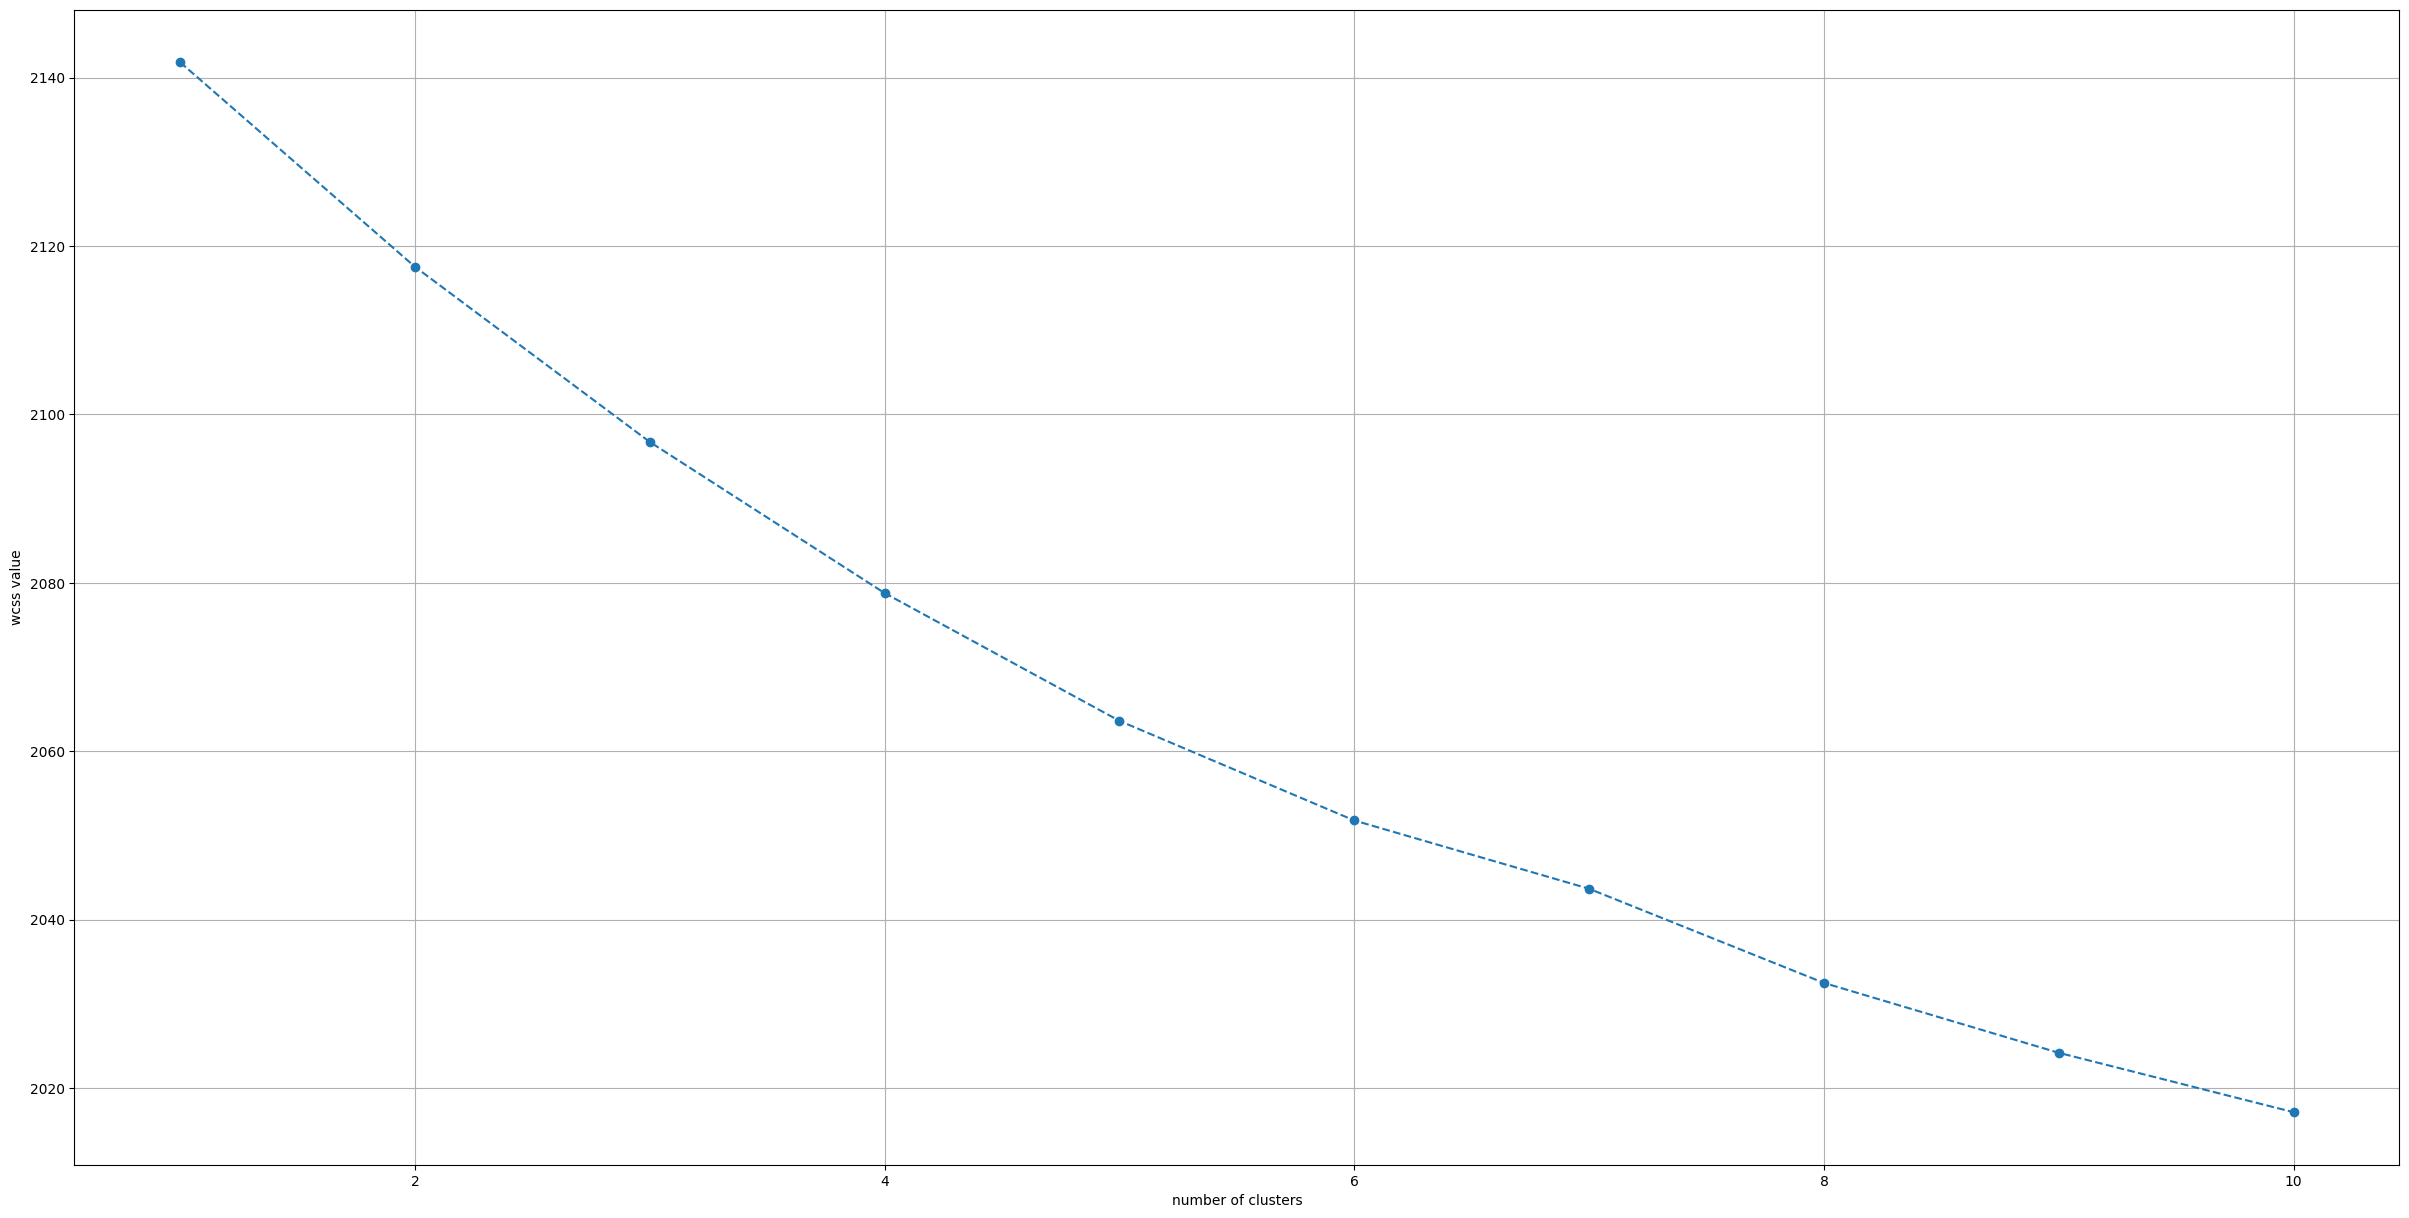

In [128]:
# k-means clustering implementation: 

# 4. Utilize WCSS to find the ideal number of clusters (ranging 1-10). 

def wcss_ideal_clusters(data, k=10):
    number_of_clusters = []
    intertia_distances = []

    for numClusters in range(1, k+1):
        kmeans = KMeans(n_clusters = numClusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)

        intertia_distances.append(kmeans.inertia_)
        number_of_clusters.append(numClusters)

    plt.subplots(figsize=(30,15))
    plt.plot(number_of_clusters, intertia_distances, 'o--')
    plt.grid(True)
    plt.ylabel('wcss value')
    plt.xlabel('number of clusters')

    return

wcss_ideal_clusters(features)

#response: it doesnt seem like there is any kind of elbow to find the optimal k number of clusters
#this could  be the fact that k-means is not a great way to represent and cluster this data ?????????


profs email: "To visualize the clustering result, perform dimensionality reduction to convert the original data to 2 dimensions. 

You can achieve this by importing PCA from sklearn.decomposition and setting PCA(n_components=2). 

Then, use a scatter plot, like plt.scatter, to display different clusters with different colors. 

Here's an example code snippet: plt.scatter(reduced_features[:,0], reduced_features[:,1], c=agg_labels, cmap='rainbow', alpha=0.7, edgecolors='w', s=100). 

This will help you visualize the clusters effectively."


In [146]:


# k-means clustering:
kmeans_cluster = KMeans(n_clusters=5, random_state=0)
kmeans_cluster.fit(features)
features['k_means'] = kmeans_cluster.labels_
features['k_means']

PCA_reducation = sk.decomposition.PCA(n_components=2)
reduced_features = PCA_reducation.fit_transform(features)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=features['k_means'], cmap='rainbow', alpha=0.7, edgecolors='w', s=100)


C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 3. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.